<a href="https://colab.research.google.com/github/vzorspb/DE_Sprint/blob/main/Task_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание к модулю 1.6

In [136]:
import pandas as pd
import numpy as np
text=''
df=pd.read_csv('/content/DataEngineer.csv')
for index, row in df.iterrows():
    text=text+row['Job Description']
    df.at[index,'Company Name']= row['Company Name'].split('\r\n')[0]
    if row['Founded']==-1:
       df.loc[index,'Founded']=np.nan
    if row['Type of ownership']=='-1' or row['Type of ownership']=='Unknown':
       df.loc[index,'Type of ownership']=np.nan
    if row['Rating']==-1:
       df.loc[index,'Rating']=np.nan
    if row['Industry']=='-1' or row['Industry']=='Unknown':
       df.loc[index,'Industry']=np.nan
    df.loc[index,'Company Name']=row['Company Name'].split('\n')[0]
    salary=row['Salary Estimate'].split(' ')[0].replace('(Employer','').replace('K','000').replace('$','').split('-')
    df.loc[index,'Salary Estimate']=(int(salary[0])+int(salary[1]))/2
agg ={'Job Title':['count']}
job_title_list=df.groupby('Job Title').agg(agg).reset_index().sort_values([('Job Title','count')],ascending=False)
agg ={'Company Name':['count'],'Salary Estimate':['median']}
company_list=df.groupby('Company Name').agg(agg).reset_index().sort_values([('Company Name','count')],ascending=False)
agg ={'Location':['count']}
location_list=df.groupby('Location').agg(agg).reset_index().sort_values([('Location','count')],ascending=False)
agg ={'Type of ownership':['count']}
owner_list=df.groupby('Type of ownership').agg(agg).reset_index().sort_values([('Type of ownership','count')],ascending=False)
agg ={'Industry':['count'],'Salary Estimate':['median']}
#agg ={'Industry':['count']}
industry_list=df.groupby('Industry').agg(agg).reset_index().sort_values([('Industry','count')],ascending=False)
agg ={'Rating':['count']}
rating_list=df.groupby('Rating').agg(agg).reset_index().sort_values([('Rating','count')],ascending=False)
#dataset_size=len(df)


Построить график компаний с самым большим кол-вом вакансий

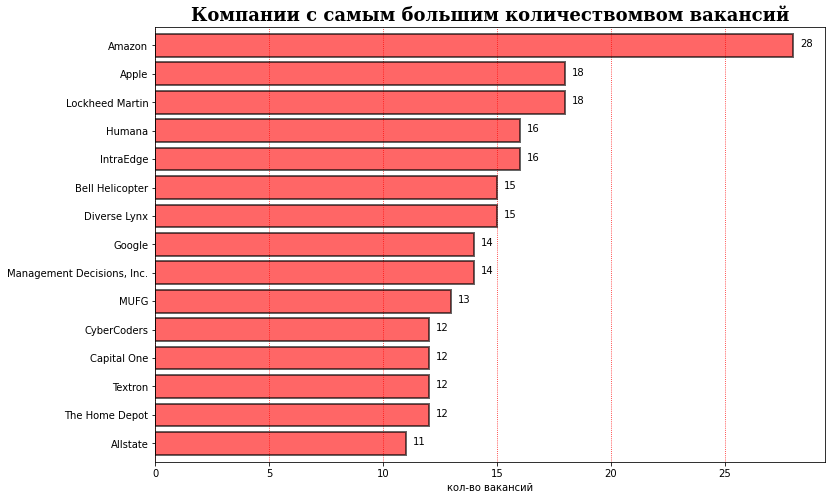

In [114]:
import matplotlib.pyplot as plt
list=company_list.head(15).sort_values(('Company Name','count'))

ax = list.plot.barh(x=('Company Name',''),y=('Company Name','count'),color='red',figsize=(12,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Компании с самым большим количествомвом вакансий',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('кол-во вакансий')
plt.show()

Построить график самых популярный названий в вакансиях

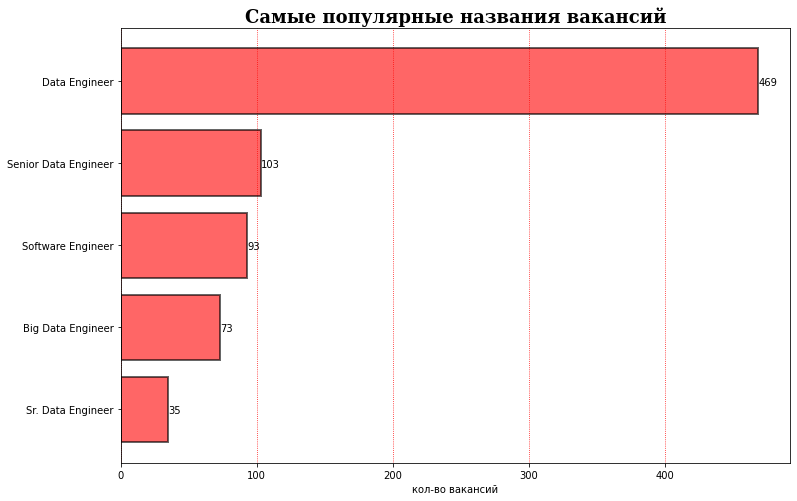

In [9]:
import matplotlib.pyplot as plt
list=job_title_list.head(5).sort_values(('Job Title','count'))
ax = list.plot.barh(x=('Job Title',''),y=('Job Title','count'),color='red',figsize=(12,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Самые популярные названия вакансий',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('кол-во вакансий')
plt.show()

Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

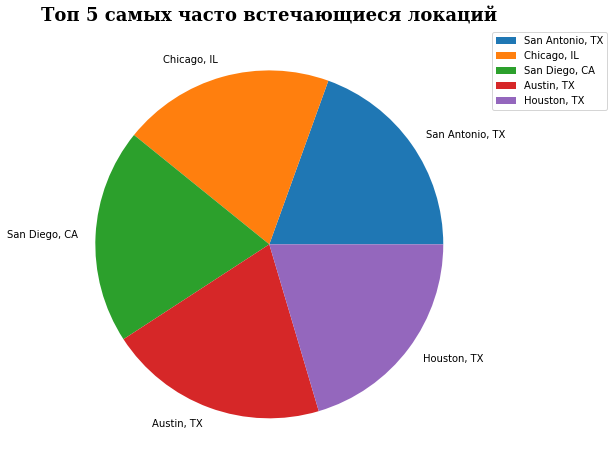

In [17]:
import matplotlib.pyplot as plt

list=location_list.head(5).sort_values(('Location','count'))
list.set_index(('Location',''), inplace=True)

ax = list.plot.pie(y=('Location','count'),figsize=(14,8))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.title('Топ 5 самых часто встечающиеся локаций',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.show()

Построить график популярности по колонке Type of ownership, относительно численности вакансий

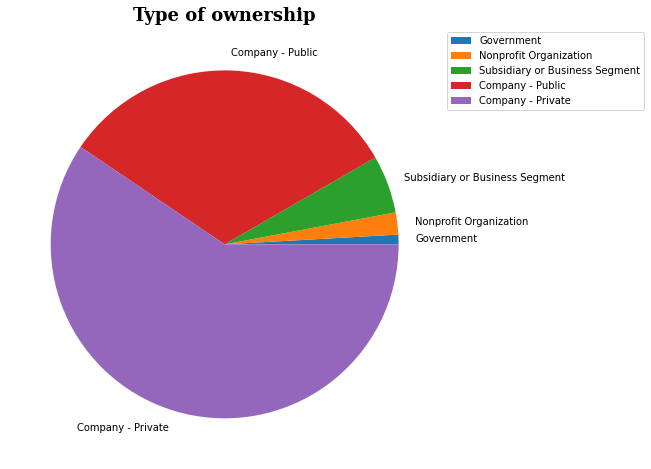

In [39]:
import matplotlib.pyplot as plt
list=owner_list.head(5).sort_values(('Type of ownership','count'))
list.set_index(('Type of ownership',''), inplace=True)

ax = list.plot.pie(y=('Type of ownership','count'),figsize=(18,8))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.title('Type of ownership',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.show()

Построить график популярности по секторам работы

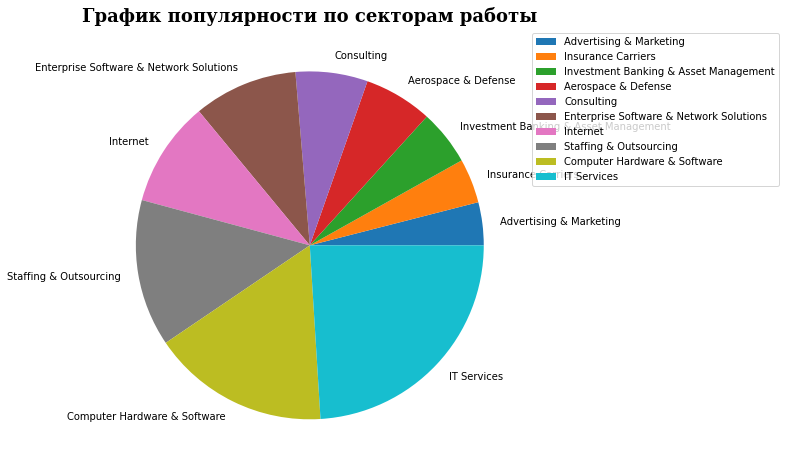

In [84]:
import matplotlib.pyplot as plt
list=industry_list.head(10).sort_values(('Industry','count'))
list.set_index(('Industry',''), inplace=True)
ax = list.plot.pie(y=('Industry','count'),figsize=(18,8))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.title('График популярности по секторам работы',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.show()

Построить график используя сектора работы и средний уровень зарплат в них

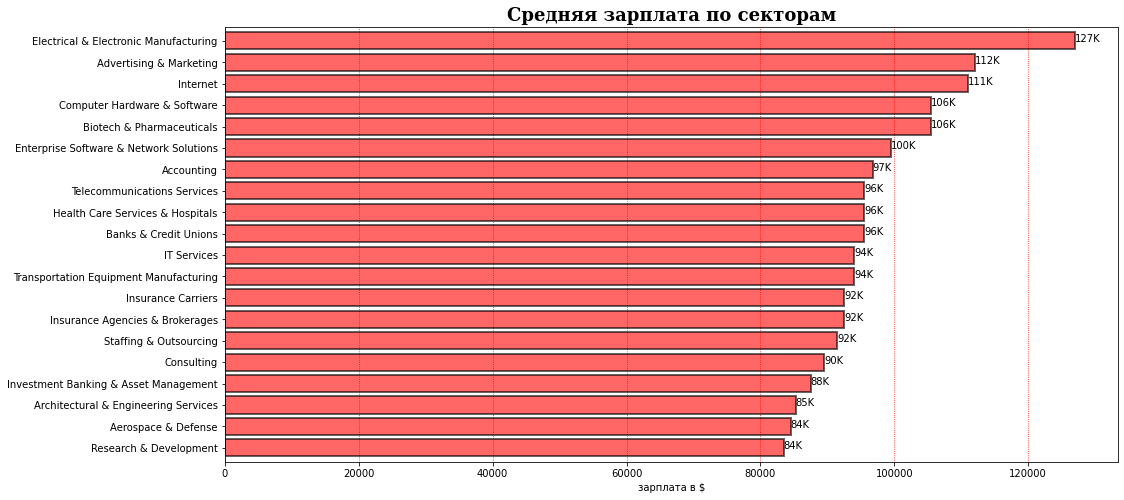

In [97]:
import matplotlib.pyplot as plt
list=industry_list.head(20).sort_values(('Salary Estimate','median'))
ax = list.plot.barh(x=('Industry',''),y=('Salary Estimate','median'),color='red',figsize=(16,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format((b.x1 + b.x0)/1000)+'K'        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Средняя зарплата по секторам',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('зарплата в $')
plt.show()

Построить гистограмму распределения рейтинга компаний

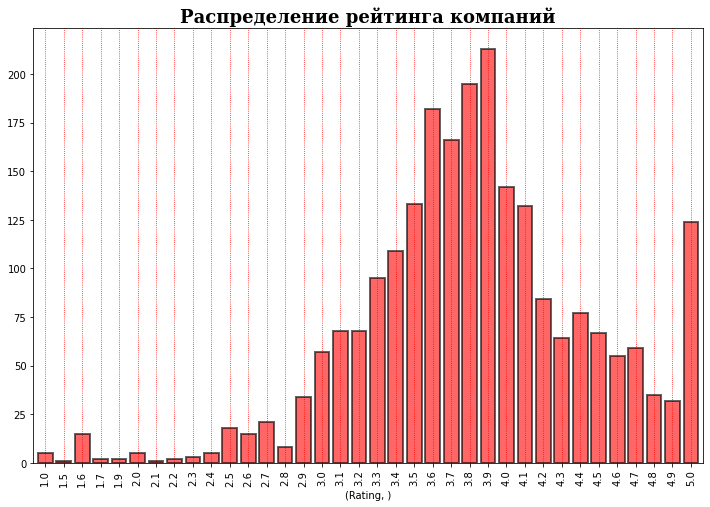

In [107]:
import matplotlib.pyplot as plt
list=rating_list.sort_values(('Rating',''))
ax = list.plot.bar(x=('Rating',''),y=('Rating','count'),color='red',figsize=(12,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45

plt.title('Распределение рейтинга компаний',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.show()

Построить график средних зарплат по популярным компаниям

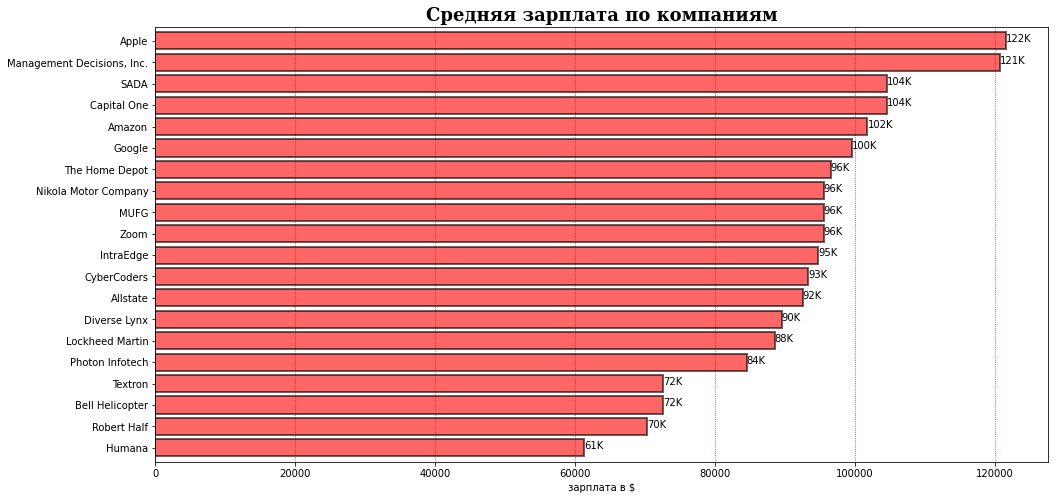

In [115]:
import matplotlib.pyplot as plt
list=company_list.head(20).sort_values(('Salary Estimate','median'))
ax = list.plot.barh(x=('Company Name',''),y=('Salary Estimate','median'),color='red',figsize=(16,8),edgecolor="k", linewidth=2, alpha=0.6, width=0.8)
ax.legend().set_visible(False)
x_offset = 0.3
y_offset = -0.45
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format((b.x1 + b.x0)/1000)+'K'        
    ax.annotate(val, (( b.x1) + x_offset, b.y1 + y_offset))

plt.title('Средняя зарплата по компаниям',fontdict={'fontsize':18, 'fontfamily':'serif', 'fontweight':'bold'})
plt.ylabel('')
ax.set_axisbelow(True)
ax.grid(axis='x')
ax.xaxis.grid(color='r',linestyle='dotted',)
plt.xlabel('зарплата в $')
plt.show()

Построить описаний вакансий облако тегов, исследовать самые популярные слова

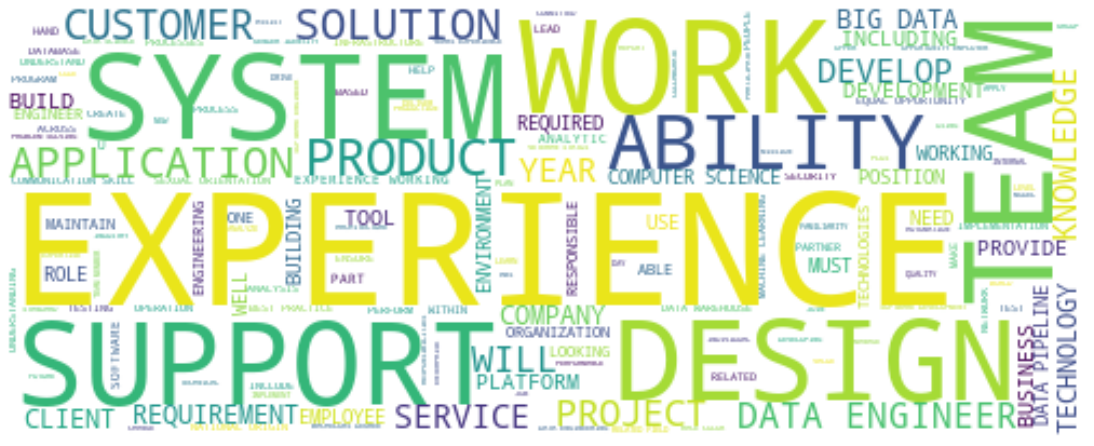

In [142]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib



text = text.replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').upper()

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, max_words = 150).generate(text)

plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()